## Initial Setup


- Run this (Links to an external site.) network (base network) for 50 epochs, report Validation Accuracy after 50 epochs. 
- Add new cells at the bottom of the code, and write your own network such that:
  - it uses depthwise separable convolution ONLY (no Conv2D)
  - it uses BatchNormalization
  - has less than 100,000 parameters
  - it uses proper dropout values
  - you've mentioned the output size for each layer
  - you've mentioned the receptive field for each layer
  - runs for 50 epochs
  - beats the validation score within 50 epochs (at any epoch run, doesn't need to be final one)
- Submit the github link 
- Your github links must have:
   - Assignment 3.ipynb file with your code as well as logs for both the models
            ReadMe.md which should have:
            - Final Validation accuracy for Base Network
            - Your model definition (model.add... ) with output channel size and receptive field
            - Your 50 epoch logs


In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import keras.applications as  applications
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Add, BatchNormalization, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


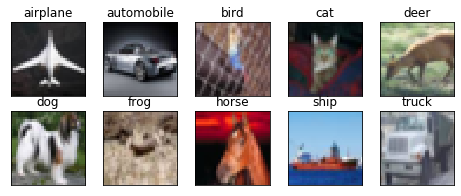

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
## Function gives the accuracy on test data
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Baseline Network with Convolution only

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 19s 48ms/step - loss: 1.8634 - acc: 0.2853 - val_loss: 1.5148 - val_acc: 0.4386
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.4027 - acc: 0.4860 - val_loss: 1.1998 - val_acc: 0.5703
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 1.1777 - acc: 0.5821 - val_loss: 1.0308 - val_acc: 0.6368
Epoch 4/50
390/390 [==============================] - 8s 20ms/step - loss: 1.0224 - acc: 0.6439 - val_loss: 0.9538 - val_acc: 0.6636
Epoch 5/50
390/390 [==============================] - 8s 20ms/step - loss: 0.9232 - acc: 0.6780 - val_loss: 0.8299 - val_acc: 0.7131
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8387 - acc: 0.7097 - val_loss: 0.7559 - val_acc: 0.7405
Epoch 7/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7815 - acc: 0.7312 - val_loss: 0.7509 - val_acc: 0.7439
Epoch 8/50
390/390 [==============================] - 8s 20ms/step -

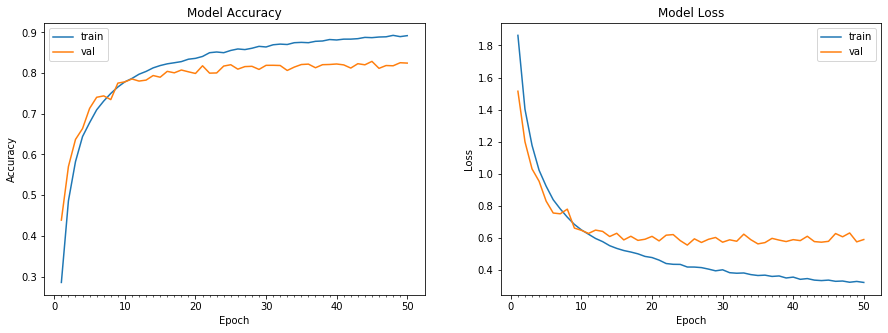

Accuracy on test data is: 82.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Section -2 with Depthwise Separable Convolution

Our Aim of thos section is to develop a model which will have accuracy on Test data more than what we got from baseline model **Accuracy on test data is: 82.40**.

**Network Approach 5B is Final Network and process described in Session-2 has been followed here to arrive into Final architecture**

*Have followed a methodical approach to do the network architecture and further finetune. All these network have gone though transformations as shown below and each of these "Network Approach" have their finetune strategy used w.r.t earlier one.*
**Last architecture "Network Approach:5" is the final network which has achieved accuracy of 83.12% and without using any convolution & Dense Layers.*

### Network Approach: 1

In [0]:
# # Define the model
# model = Sequential()
# model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3), dilation_rate=(2, 2), border_mode='valid', input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3),dilation_rate=(1, 1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))

# model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# model.add(SeparableConv2D(filters=384*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='valid'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # model.add(SeparableConv2D(filters=192, kernel_size=(3, 3),dilation_rate=(2, 2)))
# # model.add(Activation('relu'))

# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.35))

# model.add(Flatten())

# # model.add(Dense(512))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.4))

# model.add(Dense(256))
# model.add(Activation('relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(num_classes, activation='softmax'))
# # Compile the model
# model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#####################################Network Version 2 ##########################
###Performance Summary
# Epoch 00040: val_acc did not improve from 0.77060
# Epoch 41/50
# 390/390 [==============================] - 120s 308ms/step - loss: 0.2048 - acc: 0.9265 - val_loss: 0.9640 - val_acc: 0.7687

# Epoch 00041: val_acc did not improve from 0.77060
# Epoch 42/50
# 390/390 [==============================] - 120s 308ms/step - loss: 0.2004 - acc: 0.9281 - val_loss: 1.0073 - val_acc: 0.7643

# Epoch 00042: val_acc did not improve from 0.77060
###################
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters=24*2, kernel_size=(3, 3), dilation_rate=(2, 2), border_mode='valid', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3),dilation_rate=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=384*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

model.add(Dense(256))
model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=48, kernel_size=(3, 3), dilation_rate=(2, 2), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=192, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=768, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=96, kernel_size=(3, 3), dilation_rate=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36:

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_25 (Separab (None, 28, 28, 48)        219       
_________________________________________________________________
batch_normalization_25 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
activation_26 (Activation)   (None, 28, 28, 48)        0         
_________________________________________________________________
separable_conv2d_26 (Separab (None, 26, 26, 96)        5136      
_________________________________________________________________
batch_normalization_26 (Batc (None, 26, 26, 96)        384       
_________________________________________________________________
activation_27 (Activation)   (None, 26, 26, 96)        0         
_________________________________________________________________
separable_conv2d_27 (Separab (None, 22, 22, 192)      

In [0]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# def scheduler(epoch, lr):
#   return round(0.0032 * 1/(1 + 0.219 * epoch), 10)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.02,
                              patience=2, min_lr=0.0001)

filepath="weights_a3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app




Epoch 1/50
390/390 [==============================] - 131s 336ms/step - loss: 1.7926 - acc: 0.3719 - val_loss: 1.7544 - val_acc: 0.4214

Epoch 00001: val_acc improved from -inf to 0.42140, saving model to weights_a3.best.hdf5
Epoch 2/50
390/390 [==============================] - 121s 310ms/step - loss: 1.3155 - acc: 0.5304 - val_loss: 1.3492 - val_acc: 0.5173

Epoch 00002: val_acc improved from 0.42140 to 0.51730, saving model to weights_a3.best.hdf5
Epoch 3/50
390/390 [==============================] - 121s 310ms/step - loss: 1.1411 - acc: 0.5965 - val_loss: 1.1542 - val_acc: 0.6029

Epoch 00003: val_acc improved from 0.51730 to 0.60290, saving model to weights_a3.best.hdf5
Epoch 4/50
390/390 [==============================] - 121s 309ms/step - loss: 1.0116 - acc: 0.6431 - val_loss: 1.0602 - val_acc: 0.6434

Epoch 00004: val_acc improved from 0.60290 to 0.64340, saving model to weights_a3.best.hdf5
Epoch 5/50
390/390 [==============================] - 121s 310ms/step - loss: 0.9217 

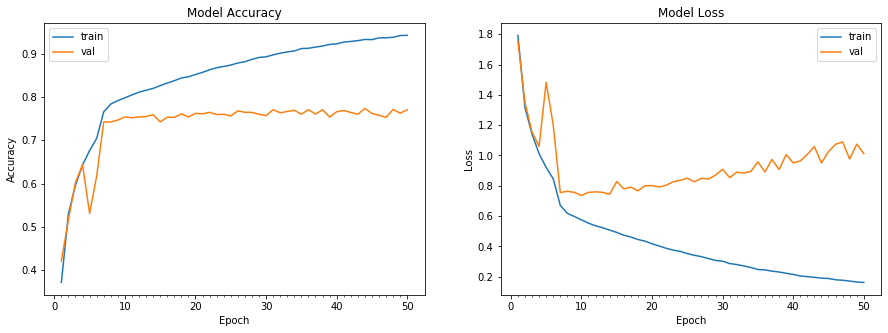

Accuracy on test data is: 77.05


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.2, 
                             horizontal_flip=False,
                             vertical_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                 callbacks=[checkpoint,reduce_lr],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Network Approach: 2

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters=24*2, kernel_size=(3, 3), dilation_rate=(2, 2), border_mode='valid', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=384*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(SeparableConv2D(filters=48*2, kernel_size=(1, 1), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())

model.add(Flatten())

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

model.add(Dense(256))
model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=48, kernel_size=(3, 3), dilation_rate=(2, 2), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=192, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=768, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=96, kernel_size=(3, 3), dilation_rate=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36:

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_33 (Separab (None, 28, 28, 48)        219       
_________________________________________________________________
batch_normalization_33 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
activation_34 (Activation)   (None, 28, 28, 48)        0         
_________________________________________________________________
separable_conv2d_34 (Separab (None, 24, 24, 96)        5136      
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 96)        384       
_________________________________________________________________
activation_35 (Activation)   (None, 24, 24, 96)        0         
_________________________________________________________________
separable_conv2d_35 (Separab (None, 20, 20, 192)      

In [0]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# def scheduler(epoch, lr):
#   return round(0.0032 * 1/(1 + 0.219 * epoch), 10)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.015,
                              patience=1, verbose=1, min_lr=0.0001)
## Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
filepath="weights_a3_2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50
390/390 [==============================] - 102s 261ms/step - loss: 1.6365 - acc: 0.4060 - val_loss: 1.5579 - val_acc: 0.4682

Epoch 00001: val_acc improved from -inf to 0.46820, saving model to weights_a3_2.best.hdf5
Epoch 2/50
390/390 [==============================] - 97s 249ms/step - loss: 1.2996 - acc: 0.5353 - val_loss: 1.3646 - val_acc: 0.5447

Epoch 00002: val_acc improved from 0.46820 to 0.54470, saving model to weights_a3_2.best.hdf5
Epoch 3/50
390/390 [==============================] - 97s 248ms/step - loss: 1.1490 - acc: 0.5937 - val_loss: 1.2118 - val_acc: 0.5786

Epoch 00003: val_acc improved from 0.54470 to 0.57860, saving model to weights_a3_2.best.hdf5
Epoch 4/50
390/390 [==============================] - 97s 248ms/step - loss: 1.0540 - acc: 0.6270 - val_loss: 1.1007 - val_acc: 0.6171

Epoch 00004: val_acc improved from 0.57860 to 0.61710, saving model to weights_a3_2.best.hdf5
Epoch 5/50
390/390 [==============================] - 97s 248ms/step - loss: 0.977

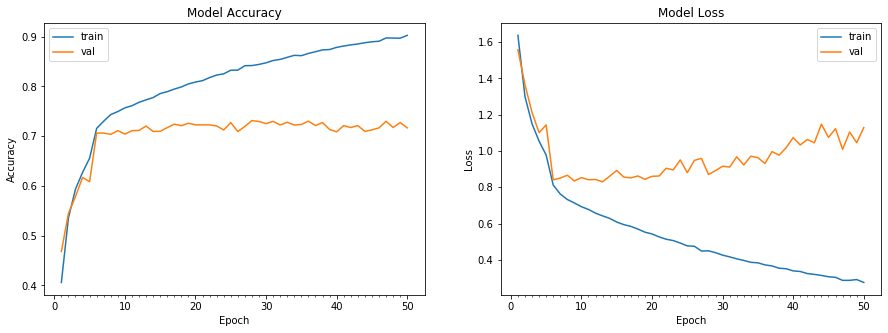

Accuracy on test data is: 71.68


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.2, 
                             horizontal_flip=False,
                             vertical_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                 callbacks=[checkpoint,reduce_lr],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model. load_weights('weights_a3_2.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Network Approach: 3

- First Layer Dilation rate has been increased from (2,2) to (3,3)
- Removed the Flatten and Added GlobalAveragePooling
- Removed 1x1 Depthwiseseparable convolution

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters=24*2, kernel_size=(3, 3), dilation_rate=(3, 3), border_mode='valid', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=384*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters=48*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(SeparableConv2D(filters=96*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# model.add(SeparableConv2D(filters=96*2, kernel_size=(1, 1), dilation_rate=(2, 2),border_mode='same'))
# model.add(BatchNormalization())

# model.add(Flatten())

model.add(GlobalAveragePooling2D())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.35))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# Compile the model
# model.compile(optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=48, kernel_size=(3, 3), dilation_rate=(3, 3), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=192, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=768, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=96, kernel_size=(3, 3), dilation_rate=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36:

In [0]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.8999999761581421,
 'beta_2': 0.9990000128746033,
 'decay': 0.0,
 'epsilon': 1e-07,
 'lr': 0.0010000000474974513}

In [0]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_162 (Separa (None, 26, 26, 48)        219       
_________________________________________________________________
batch_normalization_162 (Bat (None, 26, 26, 48)        192       
_________________________________________________________________
activation_149 (Activation)  (None, 26, 26, 48)        0         
_________________________________________________________________
separable_conv2d_163 (Separa (None, 22, 22, 96)        5136      
_________________________________________________________________
batch_normalization_163 (Bat (None, 22, 22, 96)        384       
_________________________________________________________________
activation_150 (Activation)  (None, 22, 22, 96)        0         
_________________________________________________________________
separable_conv2d_164 (Separa (None, 18, 18, 192)     

In [0]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

def scheduler(epoch, lr):
  return round(0.0032 * 1/(1 + 0.219 * epoch), 10)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.005,
                              patience=1, cooldown =1, min_lr=0.0001)
## Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
filepath="weights_a3_3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.2,rotation_range=0, 
                             horizontal_flip=False,
                             vertical_flip=False)

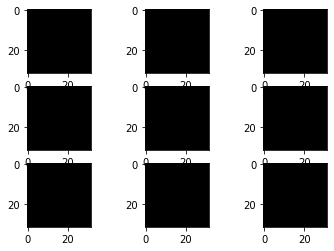

In [0]:
## see example augmentation images
for X_batch, y_batch in datagen.flow(train_features, train_labels, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  import sys


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.0032.
390/390 [==============================] - 41s 104ms/step - loss: 1.6329 - acc: 0.4043 - val_loss: 2.0890 - val_acc: 0.4162

Epoch 00001: val_acc improved from -inf to 0.41620, saving model to weights_a3_3.best.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0026251025.
390/390 [==============================] - 31s 79ms/step - loss: 1.3201 - acc: 0.5318 - val_loss: 1.7656 - val_acc: 0.4839

Epoch 00002: val_acc improved from 0.41620 to 0.48390, saving model to weights_a3_3.best.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0022253129.
390/390 [==============================] - 31s 79ms/step - loss: 1.1625 - acc: 0.5904 - val_loss: 1.4042 - val_acc: 0.5471

Epoch 00003: val_acc improved from 0.48390 to 0.54710, saving model to weights_a3_3.best.hdf5
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.001931201.
390/390 [==

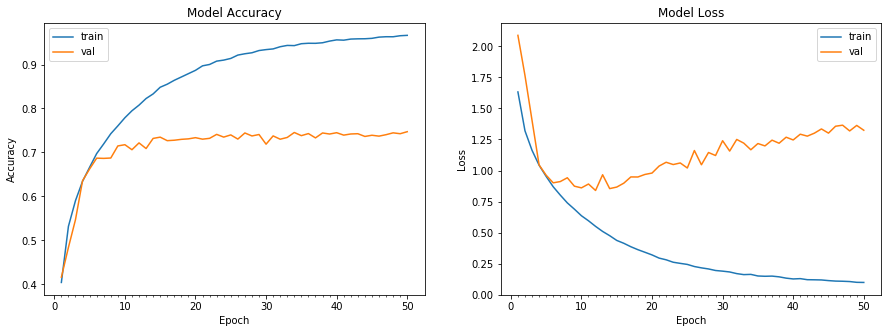

Accuracy on test data is: 74.72


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model. load_weights('weights_a3_3.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 74.72


### Network Approach: 4

**Strategy Used**:

- First Layer border mode has been changed to Same
- 2nd layer dilation rate has been increased from (2,2) to (3,3)
- Have used Learning Rate Scheduler
- First Ran 20 epochs with minial image augemnattion which had only zoom. This gave accuracy of 80.03%
- Then again Ran with further image augmennation as shared below for 30 epoch further and this gave highest accuracy of 83.12% which gave more than baseline accuracy of 82.54% 

zoom_range=0.25,rotation_range=5,width_shift_range=0.1,height_shift_range=0.1

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters=24*2*2, kernel_size=(3, 3), dilation_rate=(3, 3), input_shape=(32, 32, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=48*2*2, kernel_size=(3, 3),dilation_rate=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=96*2*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=384*2*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters=48*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(SeparableConv2D(filters=96*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(filters=192*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# model.add(SeparableConv2D(filters=96*2, kernel_size=(1, 1), dilation_rate=(2, 2),border_mode='same'))
# model.add(BatchNormalization())

# model.add(Flatten())

model.add(GlobalAveragePooling2D())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.35))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# Compile the model
# model.compile(optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=96, kernel_size=(3, 3), dilation_rate=(3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=384, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=1536, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=192, kernel_size=(3, 3), dilation_rate=(3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36

In [0]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.8999999761581421,
 'beta_2': 0.9990000128746033,
 'decay': 0.0,
 'epsilon': 1e-07,
 'lr': 0.0010000000474974513}

In [0]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_194 (Separa (None, 32, 32, 96)        411       
_________________________________________________________________
batch_normalization_194 (Bat (None, 32, 32, 96)        384       
_________________________________________________________________
activation_181 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
separable_conv2d_195 (Separa (None, 26, 26, 192)       19488     
_________________________________________________________________
batch_normalization_195 (Bat (None, 26, 26, 192)       768       
_________________________________________________________________
activation_182 (Activation)  (None, 26, 26, 192)       0         
_________________________________________________________________
separable_conv2d_196 (Separa (None, 22, 22, 384)     

In [0]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

def scheduler(epoch, lr):
  return round(0.0032 * 1/(1 + 0.219 * epoch), 10)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.005,
                              patience=1, cooldown =1, min_lr=0.0001)
## Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
filepath="weights_a3_4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.25,rotation_range=0, 
                             horizontal_flip=False,
                             vertical_flip=False)

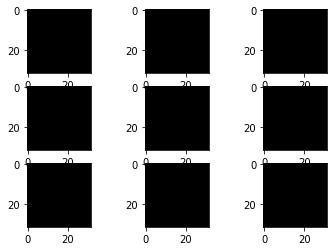

In [0]:
## see example augmentation images
for X_batch, y_batch in datagen.flow(train_features, train_labels, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=20)`
  import sys


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0032.
390/390 [==============================] - 100s 257ms/step - loss: 1.5532 - acc: 0.4402 - val_loss: 3.3957 - val_acc: 0.3295

Epoch 00001: val_acc improved from -inf to 0.32950, saving model to weights_a3_4.best.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0026251025.
390/390 [==============================] - 85s 219ms/step - loss: 1.1983 - acc: 0.5766 - val_loss: 1.9439 - val_acc: 0.4932

Epoch 00002: val_acc improved from 0.32950 to 0.49320, saving model to weights_a3_4.best.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0022253129.
390/390 [==============================] - 85s 219ms/step - loss: 1.0236 - acc: 0.6422 - val_loss: 1.3714 - val_acc: 0.5987

Epoch 00003: val_acc improved from 0.49320 to 0.59870, saving model to weights_a3_4.best.hdf5
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.001931201.
390/390 

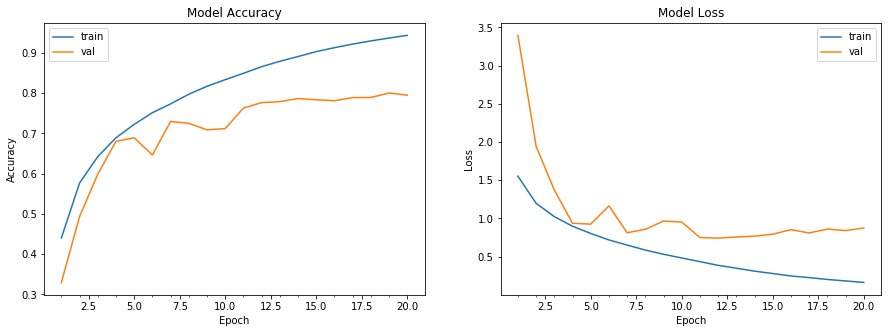

Accuracy on test data is: 79.50


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('weights_a3_4.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 80.03


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.25,rotation_range=5,width_shift_range=0.1,height_shift_range=0.1, 
                             horizontal_flip=False,
                             vertical_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., initial_epoch=20, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  import sys


Epoch 21/50

Epoch 00021: LearningRateScheduler setting learning rate to 0.0005947955.
390/390 [==============================] - 86s 220ms/step - loss: 0.3765 - acc: 0.8712 - val_loss: 0.6502 - val_acc: 0.8072

Epoch 00021: val_acc improved from 0.80030 to 0.80720, saving model to weights_a3_4.best.hdf5
Epoch 22/50

Epoch 00022: LearningRateScheduler setting learning rate to 0.0005715306.
390/390 [==============================] - 86s 221ms/step - loss: 0.3433 - acc: 0.8811 - val_loss: 0.7335 - val_acc: 0.7933

Epoch 00022: val_acc did not improve from 0.80720
Epoch 23/50

Epoch 00023: LearningRateScheduler setting learning rate to 0.0005500172.
390/390 [==============================] - 86s 221ms/step - loss: 0.3257 - acc: 0.8872 - val_loss: 0.6822 - val_acc: 0.8088

Epoch 00023: val_acc improved from 0.80720 to 0.80880, saving model to weights_a3_4.best.hdf5
Epoch 24/50

Epoch 00024: LearningRateScheduler setting learning rate to 0.0005300646.
390/390 [==============================

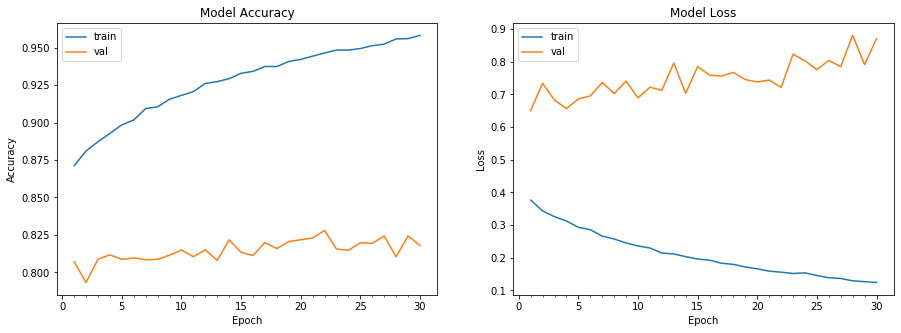

Accuracy on test data is: 81.79


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], initial_epoch = 20, nb_epoch = 50,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('weights_a3_4.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 82.80


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.3,rotation_range=10,width_shift_range=0.2,height_shift_range=0.2, 
                             horizontal_flip=True,
                             vertical_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., initial_epoch=50, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=60)`
  import sys


Epoch 51/60

Epoch 00051: LearningRateScheduler setting learning rate to 0.0002677824.
390/390 [==============================] - 86s 220ms/step - loss: 0.6858 - acc: 0.7710 - val_loss: 0.5582 - val_acc: 0.8187

Epoch 00051: val_acc did not improve from 0.82800
Epoch 52/60

Epoch 00052: LearningRateScheduler setting learning rate to 0.0002629633.
390/390 [==============================] - 86s 219ms/step - loss: 0.6413 - acc: 0.7813 - val_loss: 0.6129 - val_acc: 0.8051

Epoch 00052: val_acc did not improve from 0.82800
Epoch 53/60

Epoch 00053: LearningRateScheduler setting learning rate to 0.0002583145.
390/390 [==============================] - 86s 220ms/step - loss: 0.6261 - acc: 0.7869 - val_loss: 0.5152 - val_acc: 0.8312

Epoch 00053: val_acc improved from 0.82800 to 0.83120, saving model to weights_a3_4.best.hdf5
Epoch 54/60

Epoch 00054: LearningRateScheduler setting learning rate to 0.0002538272.
390/390 [==============================] - 86s 219ms/step - loss: 0.6055 - acc: 0.7

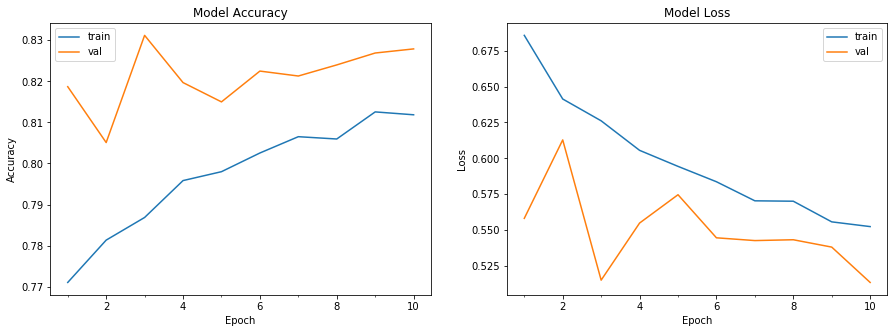

Accuracy on test data is: 82.79


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], initial_epoch = 50, nb_epoch = 60,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('weights_a3_4.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

ValueError: ignored

### Network Approach: 5

**Further Finetune Strategy Used**:
- Removed Flatten
- Added a new depthwise separable convulution layer of 10 filter to reduce numbert of channel
    model.add(SeparableConv2D(filters=10, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
- Increased number of channels before last convolution layer to compensate dense layer
    model.add(SeparableConv2D(filters=384*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
- Have GlobalAveragePooling2D which will now output 10 channel


In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters=24*2*2, kernel_size=(3, 3), dilation_rate=(3, 3), input_shape=(32, 32, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output : (None, 32, 32, 96) 
## RF 7

model.add(SeparableConv2D(filters=48*2*2, kernel_size=(3, 3),dilation_rate=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output : (None, 26, 26, 192) 
## RF 13

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=96*2*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output : (None, 22, 22, 384) 
## RF 19


model.add(SeparableConv2D(filters=192*2*2, kernel_size=(3, 3),dilation_rate=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output :  (None, 18, 18, 768)
## RF 23


# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=384*2*2, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output :  (None, 14, 14, 768)
## RF 23

model.add(MaxPooling2D(pool_size=(2, 2)))
## Output :  (None, 7, 7, 768)
## RF 46


model.add(SeparableConv2D(filters=48*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
## Output :  (None, 7, 7, 768)
## RF 54

model.add(SeparableConv2D(filters=96*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output :  (None, 7, 7, 384)
## RF 60

model.add(SeparableConv2D(filters=192*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output :  (None, 7, 7, 768)
## RF 66

model.add(SeparableConv2D(filters=384*2*2, kernel_size=(3, 3), dilation_rate=(3, 3),border_mode='same'))
model.add(BatchNormalization())
## Output :  (None, 7, 7, 1692)
## RF 72

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(SeparableConv2D(filters=10, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())

# model.add(SeparableConv2D(filters=96*2, kernel_size=(1, 1), dilation_rate=(2, 2),border_mode='same'))
# model.add(BatchNormalization())

# model.add(Flatten())

model.add(GlobalAveragePooling2D())

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.35))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# Compile the model
# model.compile(optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=96, kernel_size=(3, 3), dilation_rate=(3, 3), input_shape=(32, 32, 3..., padding="same")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=384, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
  del sys.path[0]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=1536, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=192, kernel_size=(3, 3), dilation_rate=(3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=384, kernel_size=(3, 3), dilation_rate=(3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=768, kernel_size=(3, 3), dilation_rate=(3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `SeparableConv2D` ca

In [0]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.8999999761581421,
 'beta_2': 0.9990000128746033,
 'decay': 0.0,
 'epsilon': 1e-07,
 'lr': 0.0010000000474974513}

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 96)        411       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 26, 26, 192)       19488     
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 192)       768       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 192)       0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 22, 22, 384)      

In [0]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

def scheduler(epoch, lr):
  return round(0.0032 * 1/(1 + 0.219 * epoch), 10)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.005,
                              patience=1, cooldown =1, min_lr=0.0001)
## Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
filepath="weights_a3_4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.25,rotation_range=0, 
                             horizontal_flip=False,
                             vertical_flip=False)

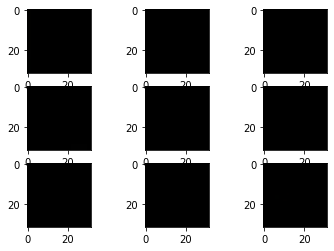

In [0]:
## see example augmentation images
for X_batch, y_batch in datagen.flow(train_features, train_labels, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=20)`
  import sys




Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0032.
390/390 [==============================] - 111s 285ms/step - loss: 1.6049 - acc: 0.4108 - val_loss: 4.7465 - val_acc: 0.3747

Epoch 00001: val_acc improved from -inf to 0.37470, saving model to weights_a3_4.best.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0026251025.
390/390 [==============================] - 102s 262ms/step - loss: 1.2234 - acc: 0.5629 - val_loss: 2.0710 - val_acc: 0.4759

Epoch 00002: val_acc improved from 0.37470 to 0.47590, saving model to weights_a3_4.best.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0022253129.
390/390 [==============================] - 102s 262ms/step - loss: 1.0382 - acc: 0.6325 - val_loss: 1.1438 - val_acc: 0.6210

Epoch 00003: val_acc improved from 0.47590 to 0.62100, saving model to weights_a3_4.best.hdf5
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.001931201.
390/

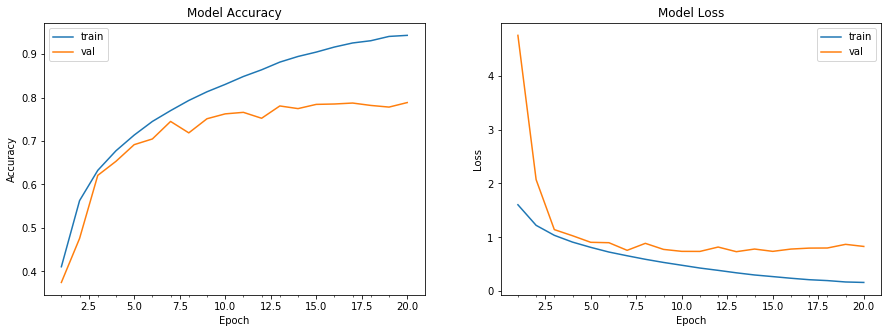

Accuracy on test data is: 78.84


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('weights_a3_4.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 78.84


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.25,rotation_range=5,width_shift_range=0.1,height_shift_range=0.1, 
                             horizontal_flip=False,
                             vertical_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., initial_epoch=20, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  import sys


Epoch 21/50

Epoch 00021: LearningRateScheduler setting learning rate to 0.0005947955.
390/390 [==============================] - 102s 262ms/step - loss: 0.4051 - acc: 0.8633 - val_loss: 0.7637 - val_acc: 0.7936

Epoch 00021: val_acc improved from 0.78840 to 0.79360, saving model to weights_a3_4.best.hdf5
Epoch 22/50

Epoch 00022: LearningRateScheduler setting learning rate to 0.0005715306.
390/390 [==============================] - 102s 262ms/step - loss: 0.3522 - acc: 0.8777 - val_loss: 0.7676 - val_acc: 0.7882

Epoch 00022: val_acc did not improve from 0.79360
Epoch 23/50

Epoch 00023: LearningRateScheduler setting learning rate to 0.0005500172.
390/390 [==============================] - 102s 262ms/step - loss: 0.3266 - acc: 0.8861 - val_loss: 0.7874 - val_acc: 0.7878

Epoch 00023: val_acc did not improve from 0.79360
Epoch 24/50

Epoch 00024: LearningRateScheduler setting learning rate to 0.0005300646.
390/390 [==============================] - 102s 262ms/step - loss: 0.3110 - acc:

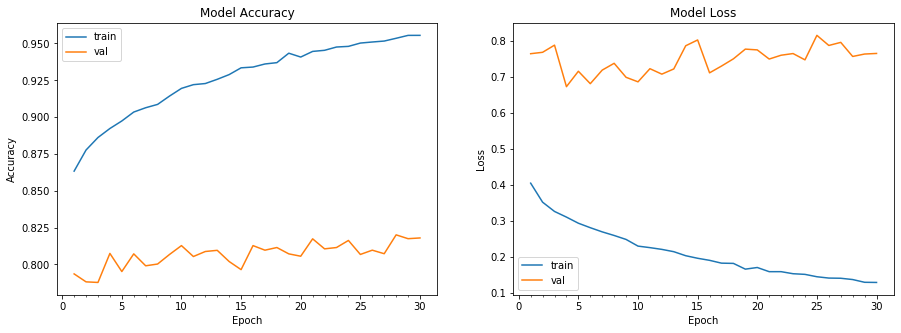

Accuracy on test data is: 81.80


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], initial_epoch = 20, nb_epoch = 50,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('weights_a3_4.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 82.01


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0,rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,
#                              horizontal_flip=True,
#                              vertical_flip=False)

datagen = ImageDataGenerator(zoom_range=0.3,rotation_range=10,width_shift_range=0.2,height_shift_range=0.2, 
                             horizontal_flip=True,
                             vertical_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., initial_epoch=50, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=60)`
  import sys


Epoch 51/60

Epoch 00051: LearningRateScheduler setting learning rate to 0.0002677824.
390/390 [==============================] - 86s 220ms/step - loss: 0.6858 - acc: 0.7710 - val_loss: 0.5582 - val_acc: 0.8187

Epoch 00051: val_acc did not improve from 0.82800
Epoch 52/60

Epoch 00052: LearningRateScheduler setting learning rate to 0.0002629633.
390/390 [==============================] - 86s 219ms/step - loss: 0.6413 - acc: 0.7813 - val_loss: 0.6129 - val_acc: 0.8051

Epoch 00052: val_acc did not improve from 0.82800
Epoch 53/60

Epoch 00053: LearningRateScheduler setting learning rate to 0.0002583145.
390/390 [==============================] - 86s 220ms/step - loss: 0.6261 - acc: 0.7869 - val_loss: 0.5152 - val_acc: 0.8312

Epoch 00053: val_acc improved from 0.82800 to 0.83120, saving model to weights_a3_4.best.hdf5
Epoch 54/60

Epoch 00054: LearningRateScheduler setting learning rate to 0.0002538272.
390/390 [==============================] - 86s 219ms/step - loss: 0.6055 - acc: 0.7

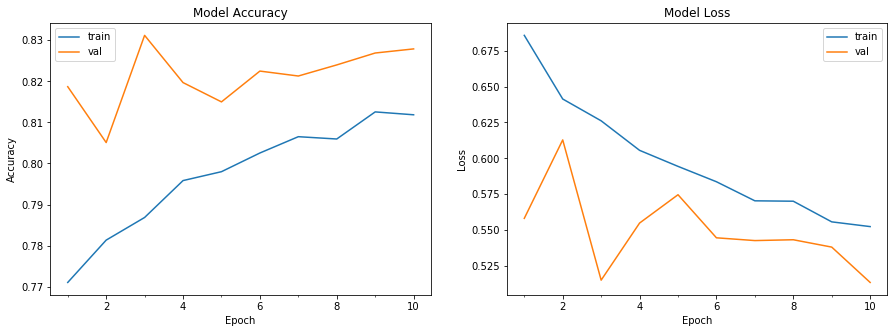

Accuracy on test data is: 82.79


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], initial_epoch = 50, nb_epoch = 60,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('weights_a3_4.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

ValueError: ignored

### Network Approach: 5B (Final and Finetuned Network)

**Further Finetune Strategy Used**:
- Used the baseline network and converted all convolution to depthwise separable convolution
- Have removed the first Max Pooling with Depthwise separable convolution and dilated rate of3
- Removed Dense Network and replaced GAP


In [33]:
# Define the model
## Output : (None, 32, 32, 96) 
## RF 7
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
## OP: (None, 32, 32, 48)
## RF: 3

model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output : (None, 30, 30, 48) 
## RF: 5

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(SeparableConv2D(48, 3, 3),dilation_rate=(3, 3)))
model.add(SeparableConv2D(filters=48, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output: (None, 26, 26, 48)
## RF: 9

model.add(Dropout(0.25))

model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output: (None, 26, 26, 96)
## RF: 11

model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output (None, 24, 24, 96)
## RF: 13

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
## Output (None, 12, 12, 96)
## RF: 15

model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output : (None, 12, 12, 192)
## RF: 17

model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
## Output (None, 10, 10, 192)
## RF: 19

model.add(MaxPooling2D(pool_size=(2, 2)))
## output (None, 5, 5, 192)
## RF: 38

model.add(Dropout(0.25))

model.add(SeparableConv2D(filters=10, kernel_size=(3, 3), dilation_rate=(2, 2),border_mode='same'))
model.add(BatchNormalization())
## output (None, 5, 5, 10)
## RF: 42

model.add(GlobalAveragePooling2D())

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(filters=48, kernel_size=(3, 3), dilation_rate=(2, 2), padding="valid")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_22 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_23 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_24 (Separab (None, 26, 26, 48)       

In [0]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

def scheduler(epoch, lr):
  return round(0.032 * 1/(1 + 0.219 * epoch), 10)

# keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.005,
#                               patience=1, cooldown =1, min_lr=0.0001)
## Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
filepath="weights_a3_5B.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.25,rotation_range=0, 
                             horizontal_flip=False,
                             vertical_flip=False)

datagen = ImageDataGenerator()
# datagen = ImageDataGenerator(preprocessing_function=images_aug)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=20)`
  import sys


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.032.
390/390 [==============================] - 61s 157ms/step - loss: 1.5698 - acc: 0.4127 - val_loss: 4.3453 - val_acc: 0.3043

Epoch 00001: val_acc improved from -inf to 0.30430, saving model to weights_a3_5B.best.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0262510254.
390/390 [==============================] - 56s 143ms/step - loss: 1.1465 - acc: 0.5868 - val_loss: 1.9577 - val_acc: 0.5078

Epoch 00002: val_acc improved from 0.30430 to 0.50780, saving model to weights_a3_5B.best.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0222531293.
390/390 [==============================] - 56s 142ms/step - loss: 0.9530 - acc: 0.6603 - val_loss: 1.5015 - val_acc: 0.5322

Epoch 00003: val_acc improved from 0.50780 to 0.53220, saving model to weights_a3_5B.best.hdf5
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0193120097.
390/39

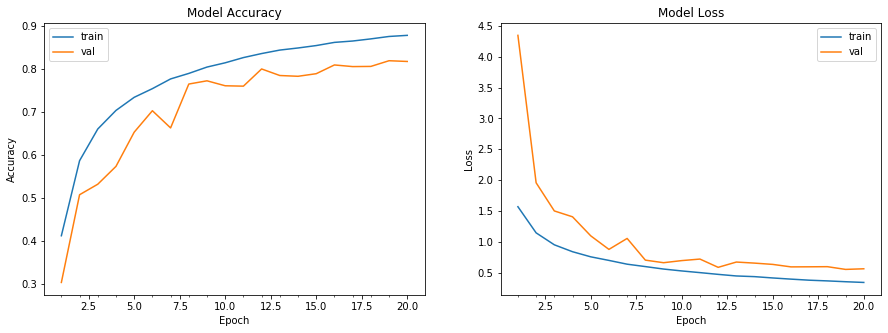

Accuracy on test data is: 81.70


In [37]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [38]:
model.load_weights('weights_a3_5B.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 81.87


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.25,rotation_range=0, 
                             horizontal_flip=False,
                             vertical_flip=False)

datagen = ImageDataGenerator()

Epoch 21/50

Epoch 00021: LearningRateScheduler setting learning rate to 0.0059479554.
  1/390 [..............................] - ETA: 57s - loss: 0.3023 - acc: 0.8984

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., initial_epoch=20, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  


390/390 [==============================] - 56s 143ms/step - loss: 0.3355 - acc: 0.8818 - val_loss: 0.6353 - val_acc: 0.7969

Epoch 00021: val_acc did not improve from 0.81870
Epoch 22/50

Epoch 00022: LearningRateScheduler setting learning rate to 0.0057153063.
390/390 [==============================] - 56s 144ms/step - loss: 0.3251 - acc: 0.8846 - val_loss: 0.5332 - val_acc: 0.8282

Epoch 00022: val_acc improved from 0.81870 to 0.82820, saving model to weights_a3_5B.best.hdf5
Epoch 23/50

Epoch 00023: LearningRateScheduler setting learning rate to 0.0055001719.
390/390 [==============================] - 56s 144ms/step - loss: 0.3193 - acc: 0.8878 - val_loss: 0.5699 - val_acc: 0.8216

Epoch 00023: val_acc did not improve from 0.82820
Epoch 24/50

Epoch 00024: LearningRateScheduler setting learning rate to 0.005300646.
390/390 [==============================] - 56s 144ms/step - loss: 0.3106 - acc: 0.8898 - val_loss: 0.5604 - val_acc: 0.8254

Epoch 00024: val_acc did not improve from 0.8

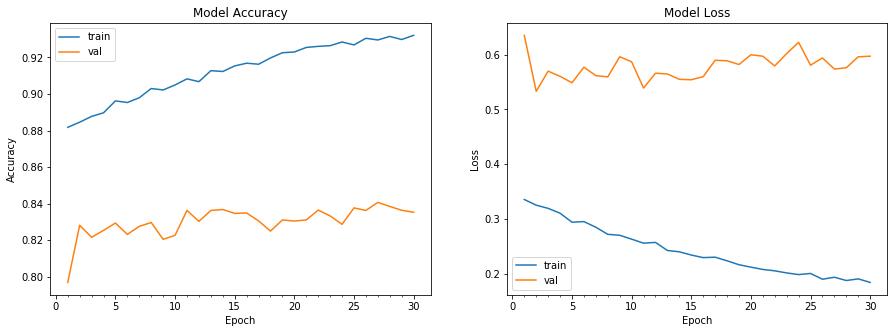

Accuracy on test data is: 83.53


In [39]:
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], initial_epoch = 20, nb_epoch = 50,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                                #  callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [40]:
model.load_weights('weights_a3_5B.best.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 84.07
